# PCA

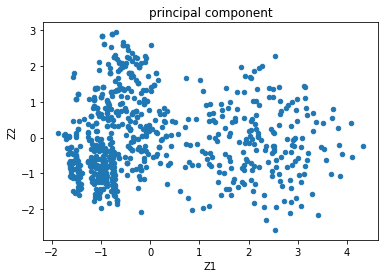

In [1]:
#!/usr/bin/python3
#Program: PCA (Principal Decomponent Analysis)
#次元圧縮プログラムである
#Version1: 2022.06.22

import numpy as np
import csv

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Read and make data from "CSV"
ifile = "result.csv"
fp = open(ifile)
dat1 = list(csv.reader(fp))
data = np.array(dat1[1:])

#
sc = StandardScaler()
data = sc.fit_transform(data)

#Run PCA
pca = PCA()
pca.fit(data)

#Get "Main Feature"
features = pca.transform(data)

plt.scatter(features[:, 0], features[:, 1], s = 20)
plt.title('principal component')
plt.xlabel('Z1')
plt.ylabel('Z2')
#plt.savefig('PCA_sample1')
plt.show()

In [ ]:
#!/usr/bin/python3
#Source: 2022.06.02: Copy of getseq.py
#Version1: 2022.06.02: Prog get IP(src, dst, id, ttl) and TCP(sport, dport, seq, win)
#プロットする点のサイズを変更する

from scapy.all import *
from datetime import datetime
import zstandard as zstd
import dpkt
import socket
import sys
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

PCAP_FILE = "20220104090001.pcap.zst"
TH_SYN = 0x02
TH_ACK = 0x10
OUTFILE = 't-outfile.csv'
PORT = 2323
#Function1: Extract pcap file from .zst compress and read with dpkt --> all packet = packets
def extract_zst(zstfile):
	with open(zstfile, "rb") as f:
		data = f.read()

	dctx = zstd.ZstdDecompressor()
	decompressed = dctx.stream_reader(data)
	packets = dpkt.pcap.Reader(decompressed)
	print("------Extract .zst and read as Pcap Successfull------")
	return packets

#Function2: Get packet from packets (srcip, dstip, ipid, ipttl) (tsport, tdport, tseq, twin)
metaif = ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "DPORT", "TSEQ", "WINDS"]
def run(packets):
	datalist = []
	#counter = 0
	for ts, buf in packets:
		try:
			eth = dpkt.ethernet.Ethernet(buf)
		except:
			print("Faile parse Frame")

		if type(eth.data) == dpkt.ip.IP:
			ip = eth.data
			srcip 	= int.from_bytes(ip.src, "big")
			dstip	= int.from_bytes(ip.dst, "big")
			ipid 	= ip.id
			ipttl 	= ip.ttl
			if dstip == 2523121634:
				continue
			#Verify: TCP packet
			if ip.p == dpkt.ip.IP_PROTO_TCP:
				tcp 	= ip.data
				try:
					tsport 	= tcp.sport
					tdport 	= tcp.dport
					tseq 	= tcp.seq
					twin 	= tcp.win
					#SYN Packets Only
					if tcp.flags == TH_SYN and tcp.flags != TH_ACK:
						if tcp.dport == PORT:
							phrase = [ipid, ipttl, srcip, dstip, tsport, tdport, tseq, twin]
							#print(phrase)
							datalist.append(phrase)
				except:
					continue
    
	with open(OUTFILE, "w") as ofile:
		write = csv.writer(ofile)
		write.writerow(metaif)
		write.writerows(datalist)
	ret = pd.DataFrame(data=datalist, columns=metaif)
	return ret

#Function 3: Main
def main(files):
	for i in files:
		print(i, end='\t')
		plotdata = run(extract_zst(i))
		df = plotdata.loc[:, ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "DPORT", "TSEQ", "WINDS"]]
		#mode = input()
		#Choose option to plot
		#if mode == "-p":
		#Pair Plot
		sns.pairplot(df, s=1, corner=True).savefig(str(port) + "pairplot.png")
		#sns.pairplot(df1, corner=True, hue='TSEQ', kind='reg').savefig("pairplot.png")
		#elif mode == "-h":
		#	#Heat map 
		#	hm = df.corr()
		#	sns.heatmap(hm)
		#	plt.savefig(str(PORT) + "heatmap.png")
		#elif mode == "-s":
		#species
		#	sns.pairplot(df, hue="species")
		#	plt.savefig("species.png")
		#else: 
		#	print("Choose the option: -p (pairplot), -h (heatmap)")
		#	exit()

if __name__ == "__main__":
	print("Type path of file")
	filename=['/data/darknet/2016/2016-09-17.pcap.zst']
	main(filename)
	print("Finish")

Type path of file
/data/darknet/2016/2016-09-17.pcap.zst	------Extract .zst and read as Pcap Successfull------


NameError: name 'outfile' is not defined

# Ward法で分類を行う

In [18]:
#Clustering Sample Program
#Ver1: 2022.06.28
import pandas as pd
df = pd.read_csv("sample-test/test.csv", index_col=0)

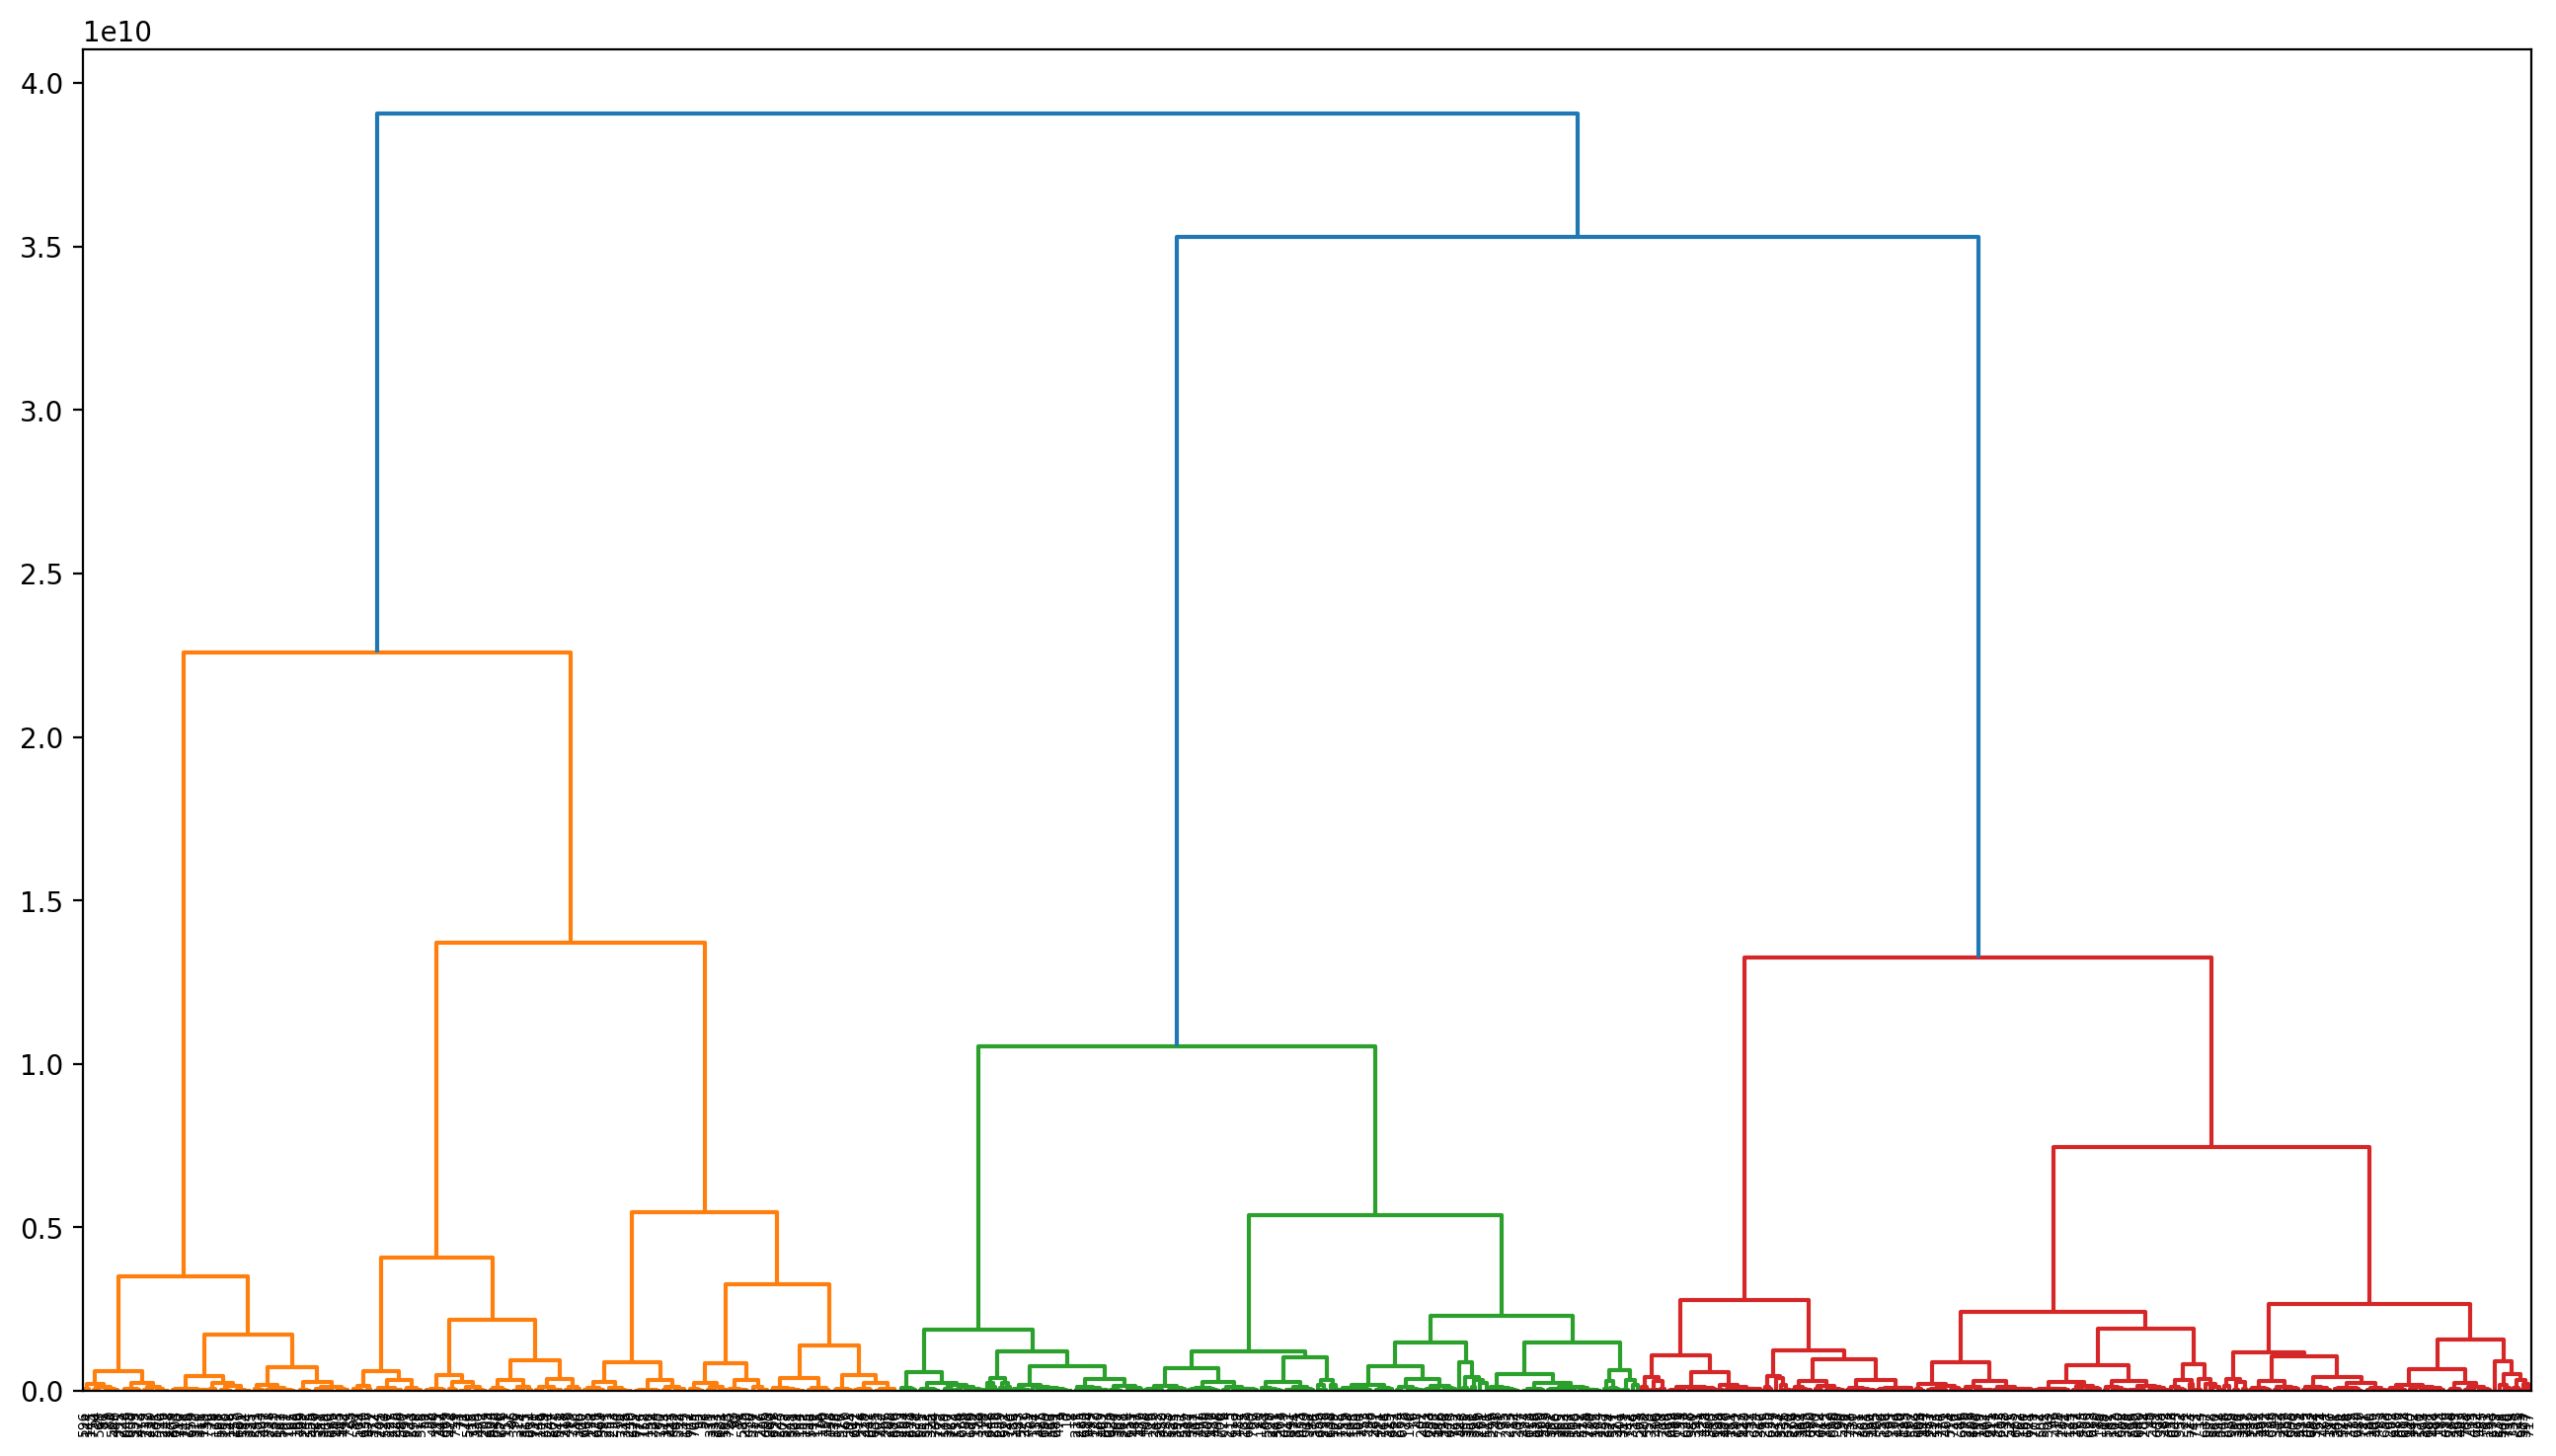

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_result = linkage(df, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=df.index)
plt.show()

# Single

In [ ]:
import pandas as pd
df = pd.read_csv("sample-test/test.csv", index_col=0)

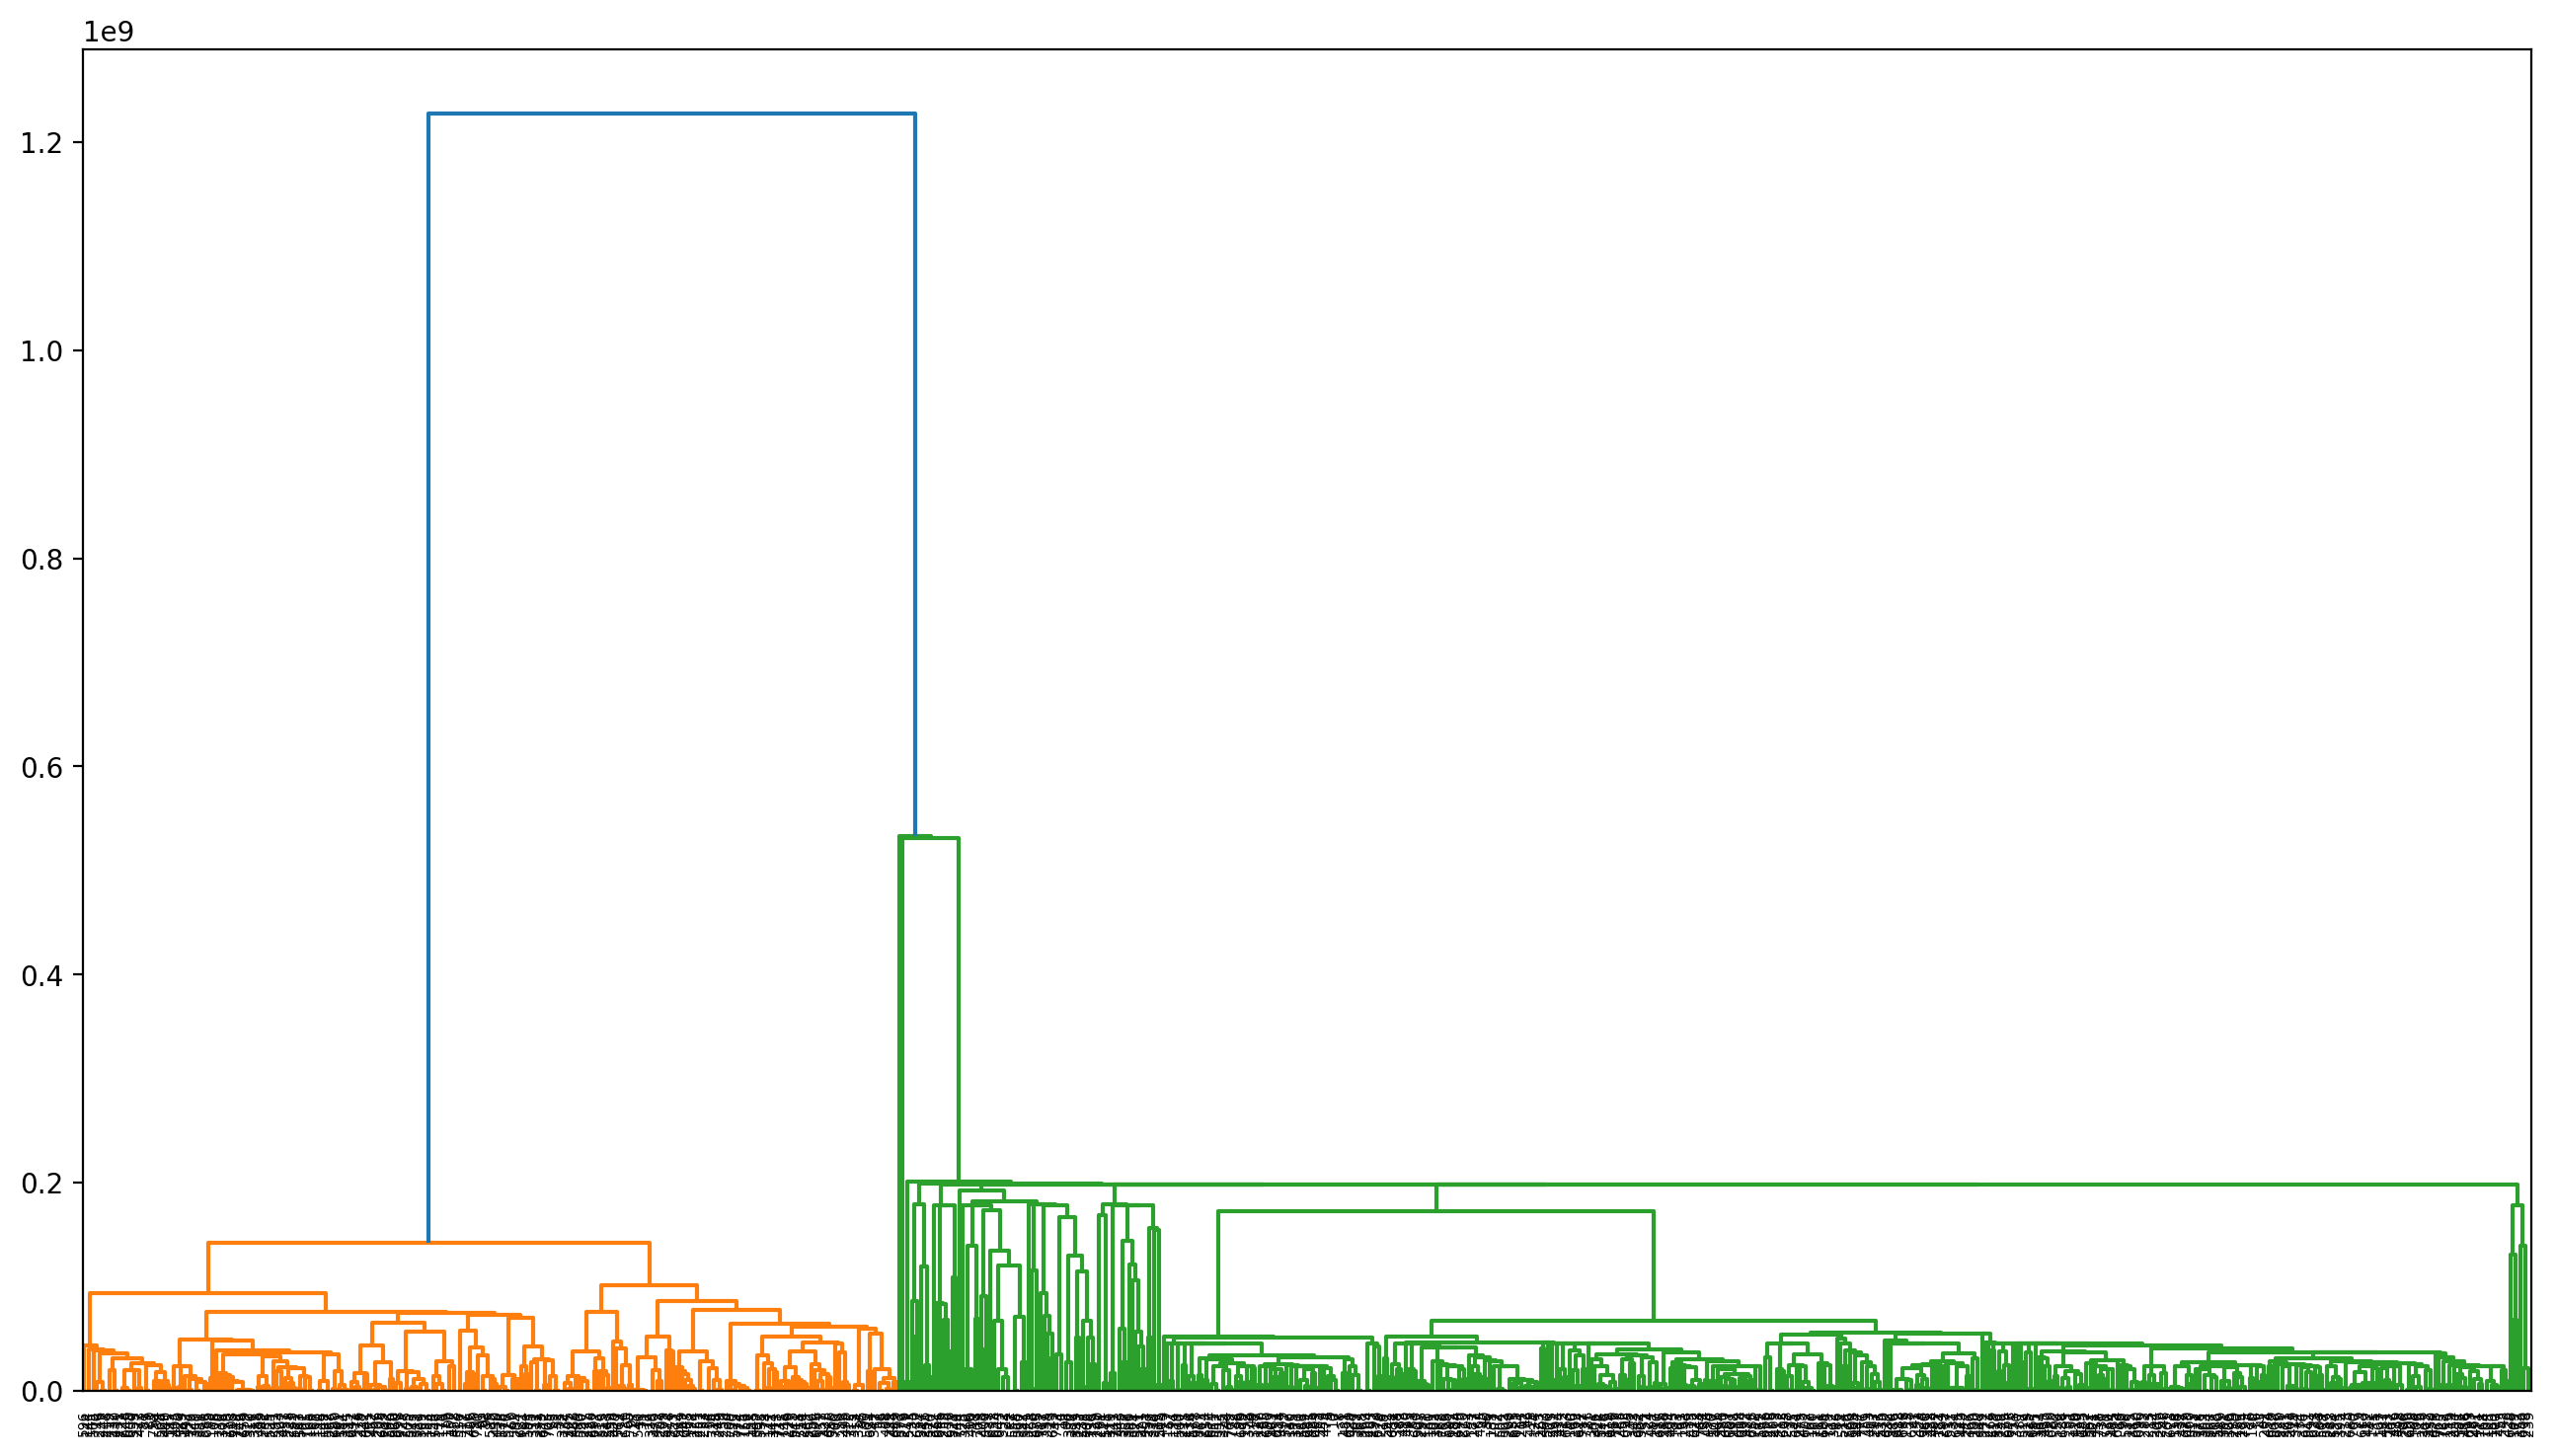

In [15]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_result = linkage(df, method='single', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=df.index)
plt.show()

# Complete法

In [16]:
import pandas as pd
df = pd.read_csv("sample-test/test.csv", index_col=0)

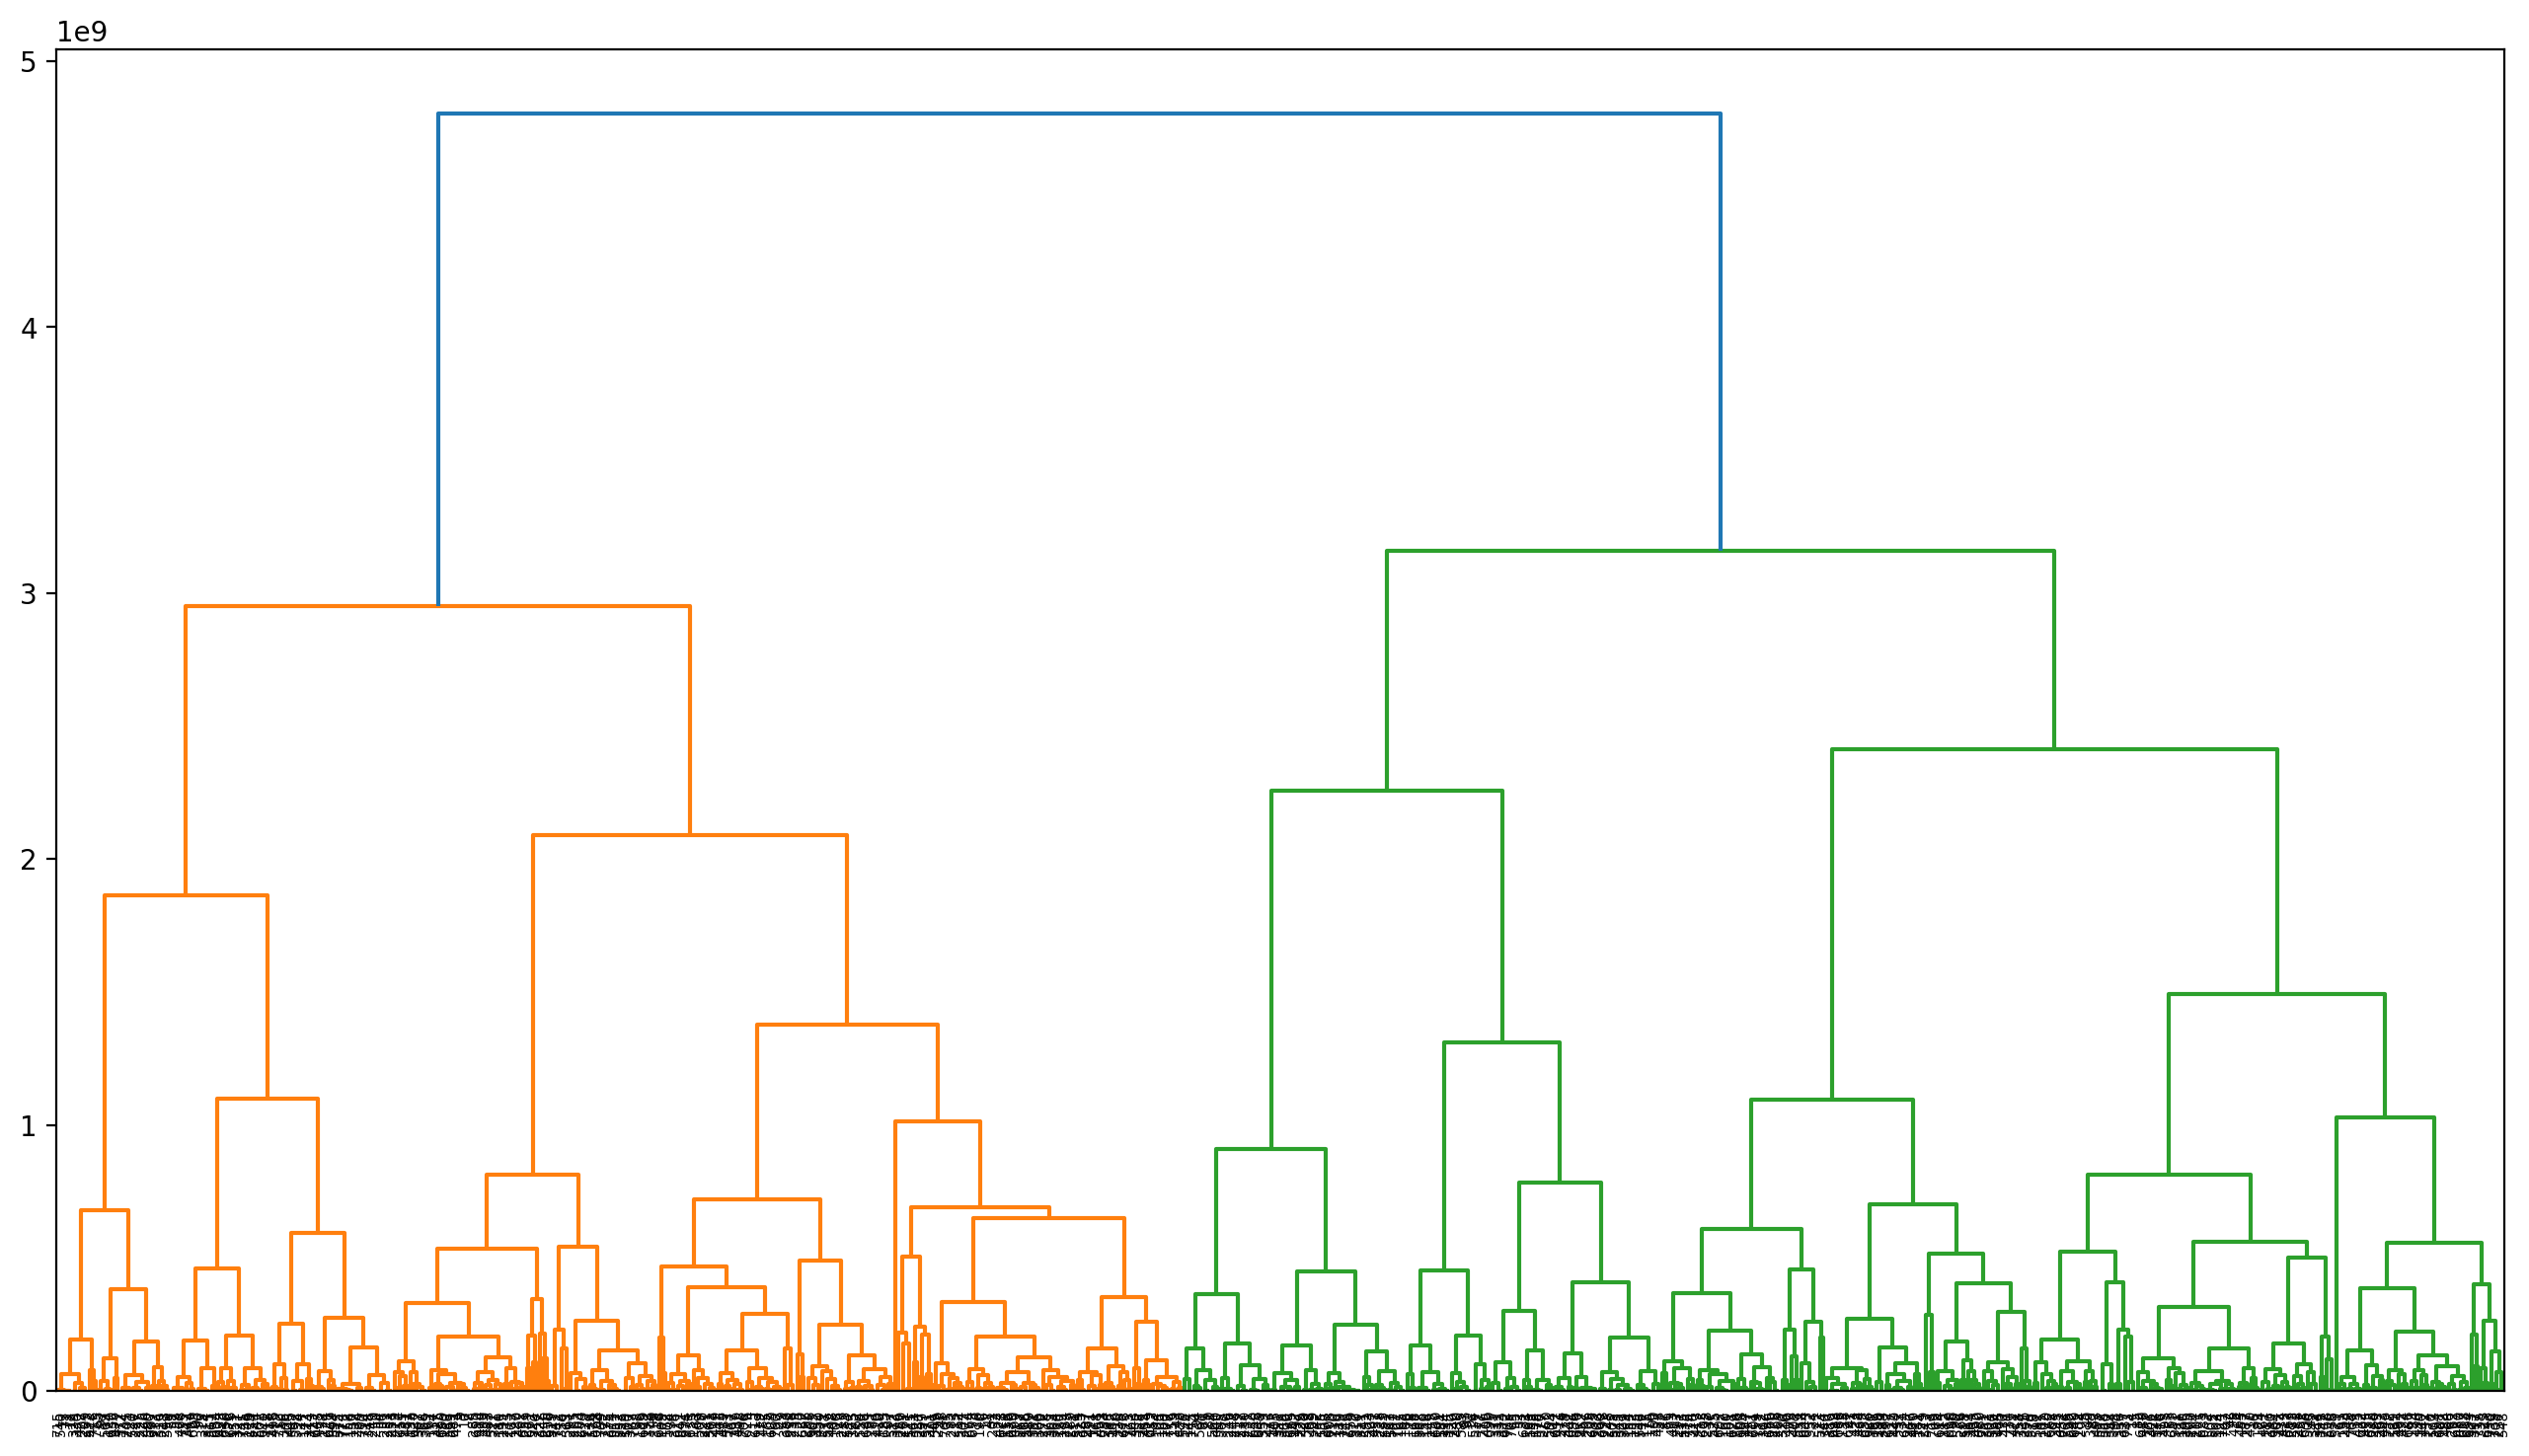

In [17]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_result = linkage(df, method='complete', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=df.index)
plt.show()

# Average method

In [3]:
import pandas as pd
df = pd.read_csv("sample-test/test.csv", index_col=0)

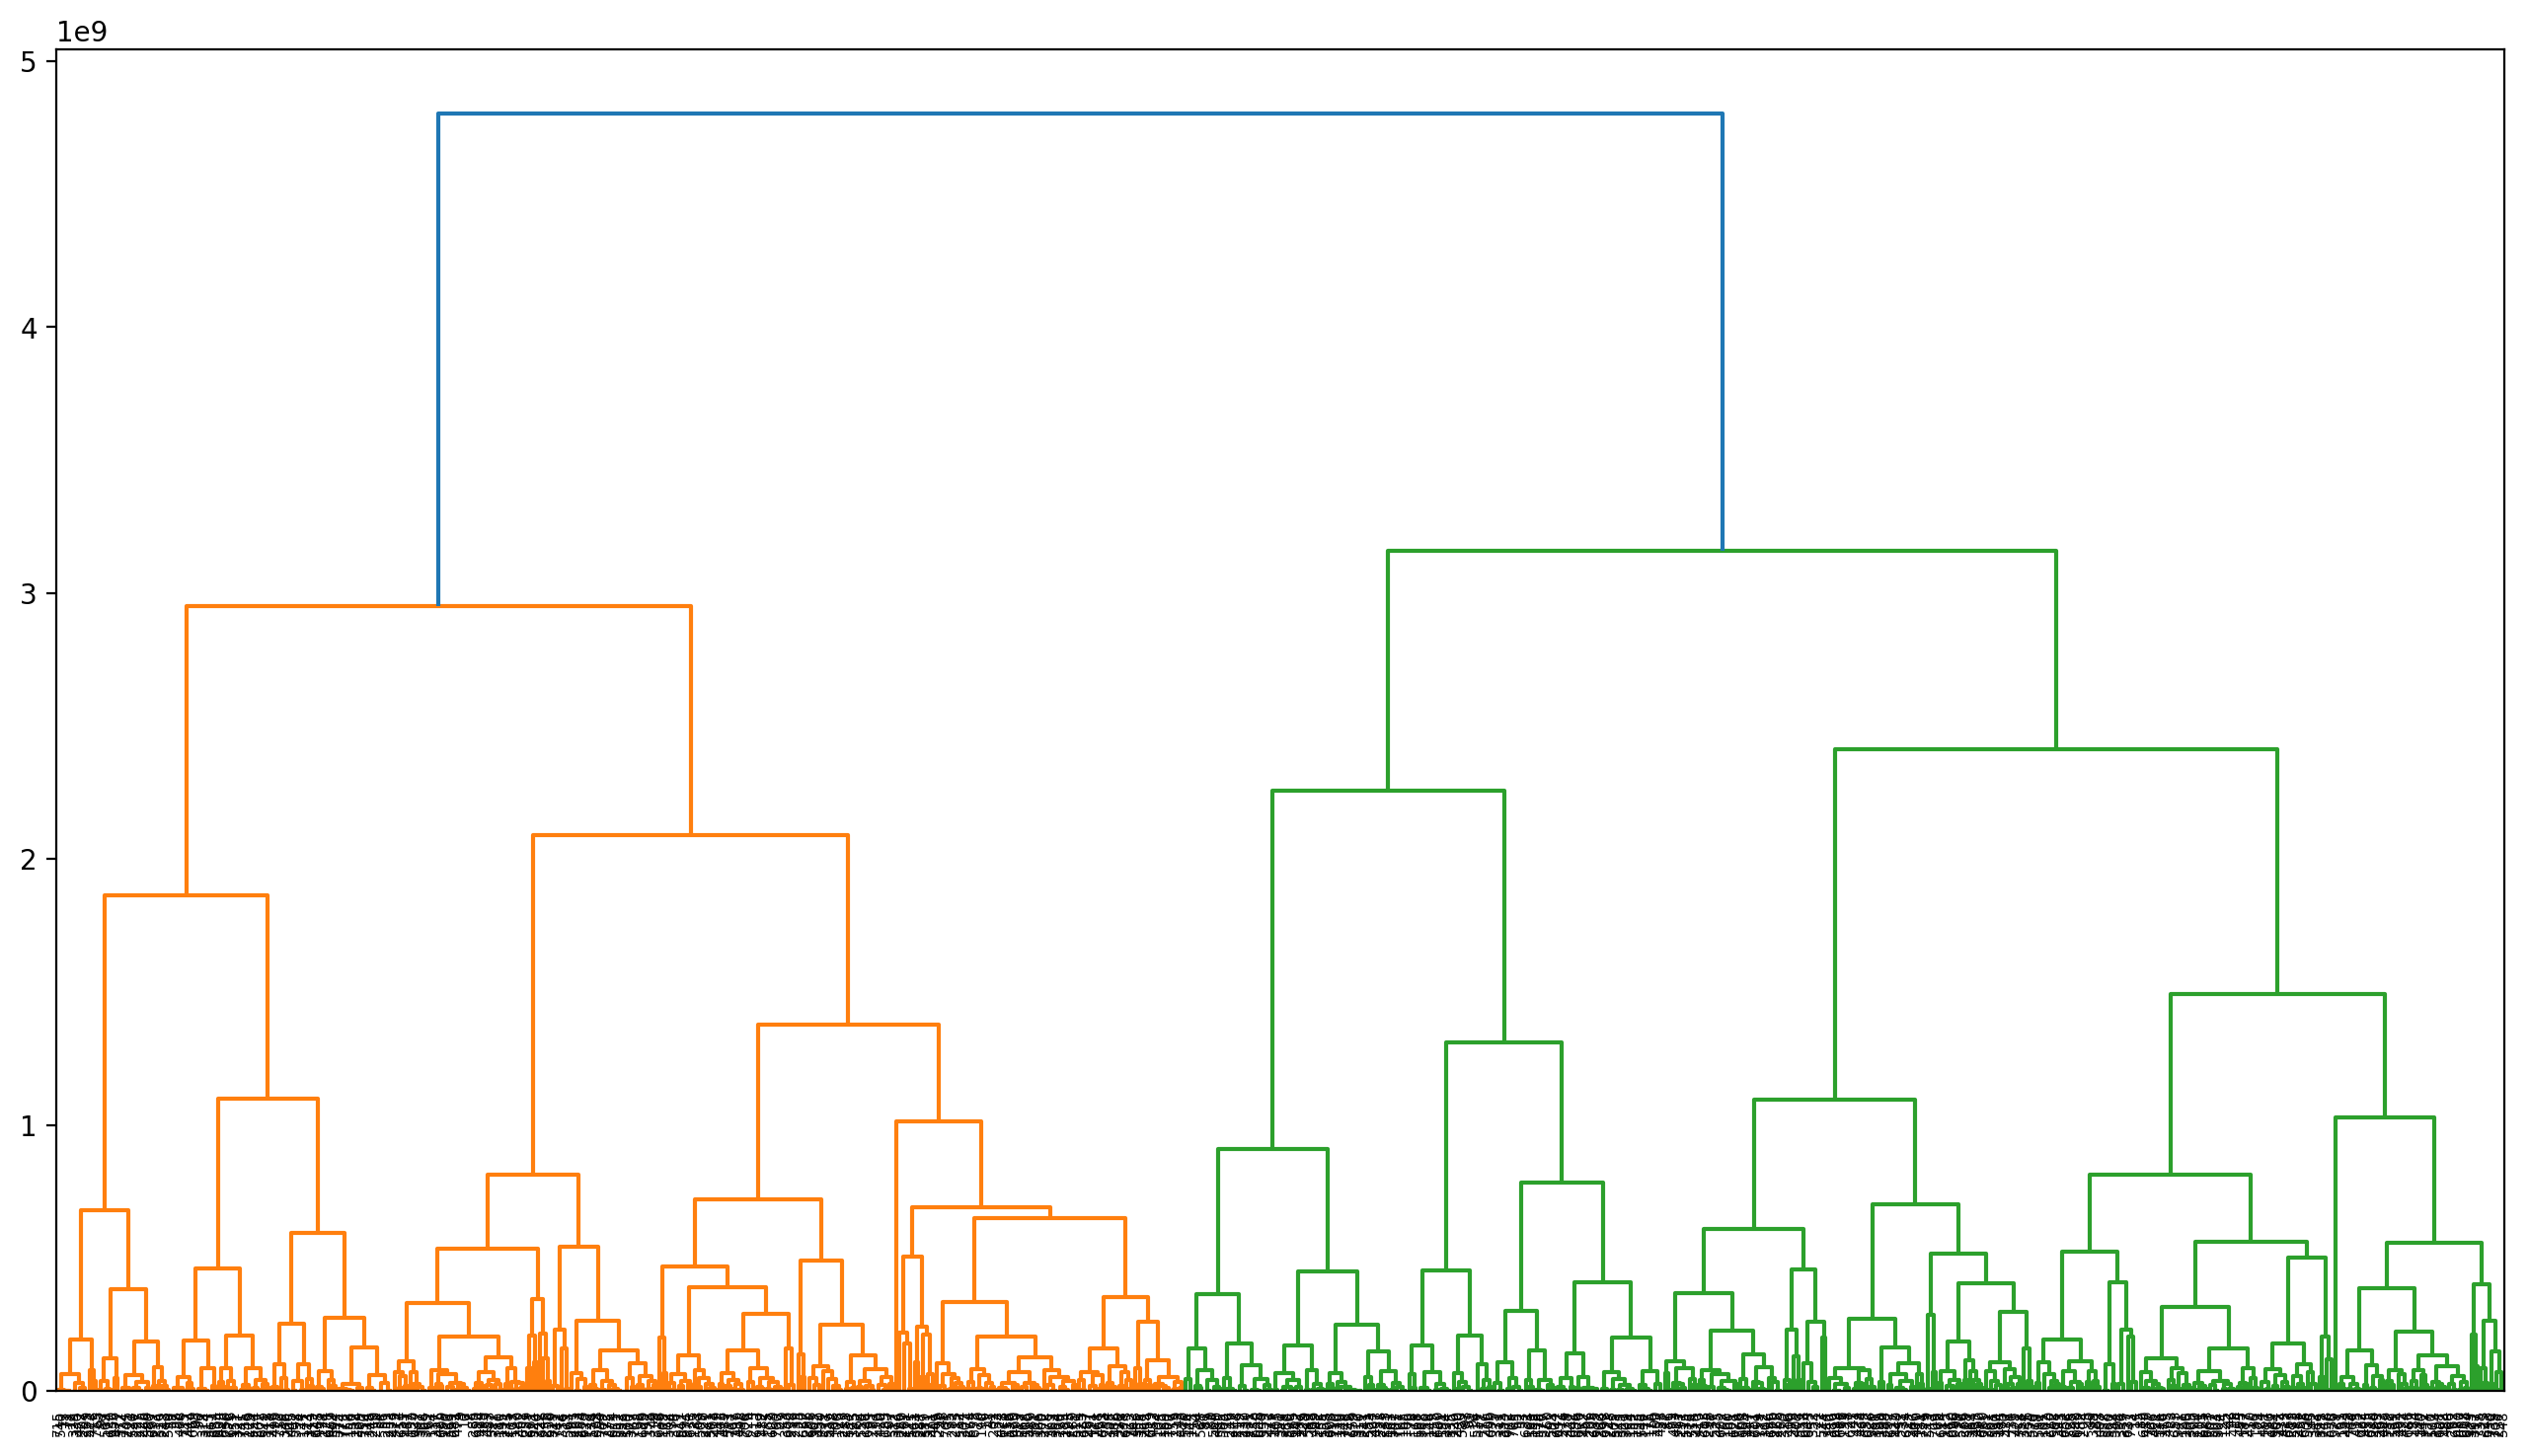

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage_result = linkage(df, method='complete', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=df.index)
plt.show()